<a href="https://colab.research.google.com/github/IYRH/RedesNeuronales/blob/main/RojasHuerta_Ines_Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inés Yaelin Rojas Huerta
# Ingenieria en Ciencias de la Computación

In [18]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np

In [9]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_images.shape)
print(test_images.shape)
print(test_labels.shape)

170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 1)


In [10]:
# miremos que los numeros de "resultados" corresponden a diferentes clases  
print(np.unique(train_labels))
print(np.unique(test_labels))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [12]:
# Estos son los nombres reales de las clases usadas para este ejemplo
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               

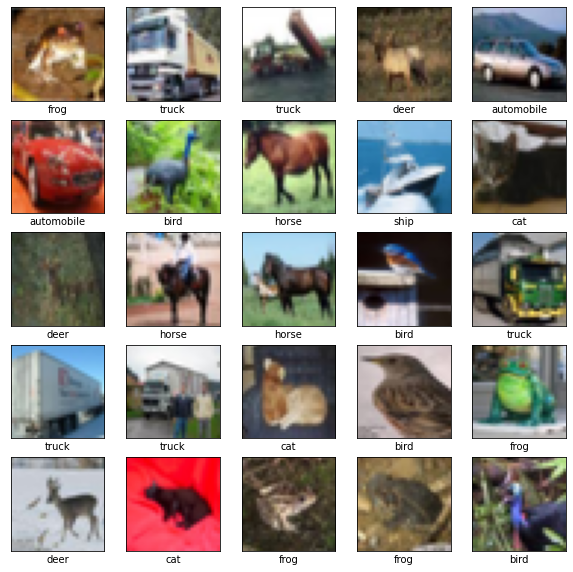

In [13]:
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [14]:
# convirtamos los datos de piexeles a que sean de tipo float32

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
 
# estandarizamos los valores, sabiendo que el maximo valor del pixel en cada imagen es de 255
train_images = train_images / 255
test_images = test_images / 255 

# Creamos los "one hot encoding" para la clase esperada (labels) 
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)



In [ ]:
#Primer modelo
 #input
# convolucional 2D, 32 canales con (3,3), y relu
# Bathnormalization
# convolucional 2D, 32 canales con (3,3), y relu
# Bathnormalization
# Maxpooling con tamano (2,2)
# Dropout con 30%
# defina una ultima capa con 10 clases y que la activacion sea "softmax"
# reporte el modelo usando model.summary()
# Compile el modelo usando como loss   loss=keras.losses.categorical_crossentropy
# Corra el model usando batch_size=64, epochs=100
# recuerde que cuando corra el modelo, guarde el resultado en una variable, llamemosla historia
# use las lineas de la siguiente celda para ver como nos fue con el loss y con el "accuracy"
#
# ahora vamos a hacer el modelo mas complejo, luego del Dropout del 30% vamos a incluir mas capas
#
# convolucional 2D, 64 canales con (3,3), y relu
# Bathnormalization
# convolucional 2D, 64 canales con (3,3), y relu
# Bathnormalization
# Maxpooling con tamano (2,2)
# Dropout con 50%
# use la misma ultima capa que antes
# reporte el modelo usando model.summary()
# compile el modelo y corralo usando los mismos parametros que antes
#
# por ultimo, agreguemos mas capas
#
# Luego del dropout de 50%
# convolucional 2D, 128 canales con (3,3), y relu
# Bathnormalization
# convolucional 2D, 128 canales con (3,3), y relu
# Bathnormalization
# Maxpooling con tamano (2,2)
# Dropout con 50%
# use la misma capa de salida
# reporte el modelo usando model.summary()
# compile el modelo y corralo usando los mismos parametros que antes
#
# para cada uno de los modelos

#*Primer* *modelo*

In [21]:
#input
# convolucional 2D, 32 canales con (3,3), y relu
# Bathnormalization
# convolucional 2D, 32 canales con (3,3), y relu
# Bathnormalization
# Maxpooling con tamano (2,2)
# Dropout con 30%
# defina una ultima capa con 10 clases y que la activacion sea "softmax"
# reporte el modelo usando model.summary()
# Compile el modelo usando como loss   loss=keras.losses.categorical_crossentropy
# Corra el model usando batch_size=64, epochs=100
# recuerde que cuando corra el modelo, guarde el resultado en una variable, llamemosla historia
# use las lineas de la siguiente celda para ver como nos fue con el loss y con el "accuracy"
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
BatchNormalization()
model.add(Conv2D(32, (3, 3), activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
model.summary()
# Recopilar capas
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


# Entrenar modelo
historia = model.fit(train_images, train_labels,
          batch_size = 64,
          epochs = 100,
          verbose=1,
          validation_data=(test_images, test_labels))


# Evaluar modelo
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                62730     
                                                      

Text(0.5, 1.0, 'Loss Curves')

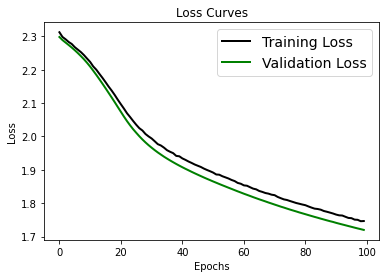

In [22]:
#Curva perdida
plt.figure(figsize=[6,4])
plt.plot(historia.history['loss'], 'black', linewidth=2.0)
plt.plot(historia.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

313/313 [==============================] - 5s 15ms/step
[[0.04442956 0.16010387 0.10873348 ... 0.01696849 0.06539915 0.033125  ]
 [0.11229126 0.19055878 0.0148461  ... 0.00406993 0.37722173 0.2826136 ]
 [0.18406935 0.07588533 0.02463377 ... 0.00826637 0.55519974 0.11029117]
 ...
 [0.01727435 0.04221784 0.05692003 ... 0.13632202 0.0096594  0.0344866 ]
 [0.02139105 0.05506453 0.11012944 ... 0.09564793 0.02023344 0.04352513]
 [0.041524   0.02619741 0.11202575 ... 0.31171012 0.01950103 0.04205621]]


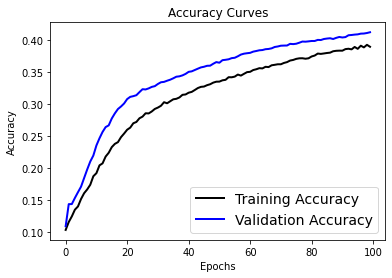

In [24]:
# curva de "accuracy"
plt.figure(figsize=[6,4])
plt.plot(historia.history['accuracy'], 'black', linewidth=2.0)
plt.plot(historia.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

pred = model.predict(test_images)
print(pred)


[3 8 8 ... 5 5 7]


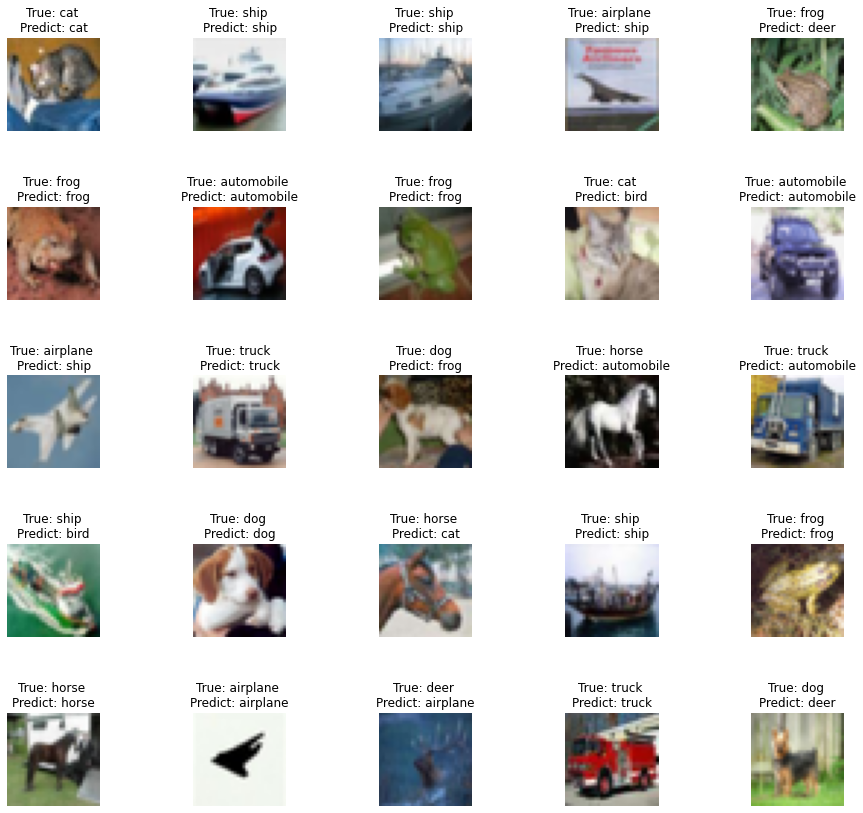

In [25]:
#convertimos las predicciones en "indices" 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
  axes[i].imshow(test_images[i])
  axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
  axes[i].axis('off')
  plt.subplots_adjust(wspace=1)